<a href="https://colab.research.google.com/github/JesseHenson/School/blob/main/Mod3_ct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage import io
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow



173 291
174 290


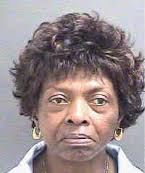

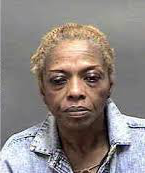

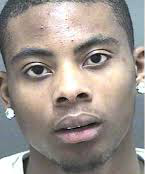

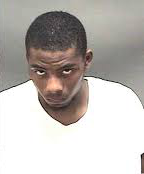

In [2]:
imgs = []

imgs.append(io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSulLs5l2Bwr6iFywEqHxQWevj9snjLRrsPxjQWsCIrJmA9cT4q"))
imgs.append(io.imread("https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQdkf_IPn6VW3jpJ_fTU4IUcwtGPbcvSfxXW4EPXjeVuMjM1Baz"))



for index, img in enumerate(imgs):
  imgs[index] = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  height = img.shape[0]
  width = img.shape[1]
  imgs[index] = [imgs[index][:,:width//2],imgs[index][:,width//2 + 1:]]
  print(height, width)
for mug_list in imgs:
  for mugshot in mug_list:
    cv2_imshow(mugshot)
# imgs.shape

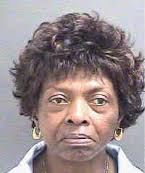

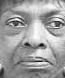

In [3]:
# image 1,1 preproc
first_img = imgs[0][0]
height = first_img.shape[0]
width = first_img.shape[1]
cv2_imshow(first_img)
first_img = cv2.cvtColor(first_img, cv2.COLOR_BGR2GRAY)
first_img = first_img[int(height*.45):int(height*.9),int(width*.3):int(width*.75)]
cv2_imshow(first_img)


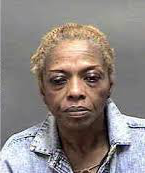

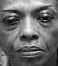

In [4]:
# image 1,2 preproc
second_img = imgs[0][1]
height = second_img.shape[0]
width = second_img.shape[1]
cv2_imshow(second_img)
second_img = cv2.cvtColor(second_img, cv2.COLOR_BGR2GRAY)
second_img = second_img[int(height*.35):int(height*.73),int(width*.33):int(width*.73)]
cv2_imshow(second_img)

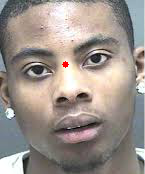

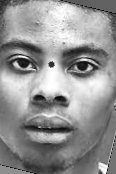

In [5]:
# image 2,1 preproc

def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

# constants
third_img = imgs[1][0]
height = third_img.shape[0]
width = third_img.shape[1]
center = (int(width * .45),int(height*.37))
third_img = cv2.circle(third_img, center, 3, (0, 0, 255), -1)
cv2_imshow(third_img)


# transofrmation

# change to gray
third_img = cv2.cvtColor(third_img, cv2.COLOR_BGR2GRAY)

# rotate about center of eyes
M = cv2.getRotationMatrix2D(center, -14, 1)
third_img = cv2.warpAffine(third_img, M, (width, height))

# crop
third_img = third_img[int(height*0):int(height),int(width*.1):int(width*.9)]

# fill black space with medium grey
for row_id, row in enumerate(third_img):
  for pixel_id, pixel in enumerate(row): 
    if pixel == 0:
      third_img[row_id][pixel_id] = 120

# hist equilize
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(3,3))
third_img = clahe.apply(third_img)


cv2_imshow(third_img)

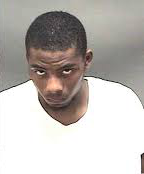

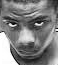

In [6]:
# image 2,2 preproc
def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]

    if center is None:
        center = (w / 2, h / 2)

    # Perform the rotation
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))

# constants
forth_img = imgs[1][1]
height = forth_img.shape[0]
width = forth_img.shape[1]
cv2_imshow(forth_img)


# transofrmation

# change to gray
forth_img = cv2.cvtColor(forth_img, cv2.COLOR_BGR2GRAY)


# crop
forth_img = forth_img[int(height*.28):int(height*.65),int(width*.2):int(width*.6)]

# hist equilize
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(2,2))
forth_img = clahe.apply(forth_img)


cv2_imshow(forth_img)

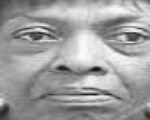

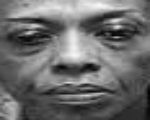

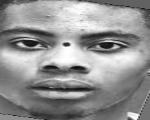

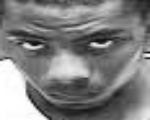

In [14]:
transformed_imgs = [first_img, second_img, third_img,forth_img]

desired_dim = (150, 120)
sharp_kern = np.array([[-1,-1,-1], [-1,10,-1], [-1,-1,-1]])
clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(3,3))


for index, trans_img in enumerate(transformed_imgs):
  transformed_imgs[index] = clahe.apply(trans_img)
  transformed_imgs[index] = cv2.resize(trans_img, desired_dim)
  # transformed_imgs[index] = cv2.filter2D(trans_img, -1, sharp_kern) 

for image in transformed_imgs:
  cv2_imshow(image)